In [4]:
#-----------------------------------------------------------------------
# diag_to_zero_continuous_E[vv2].py
# Author: Rebecca Barber
# 
# calculate the expected max virtual value of the non-favorite item 
# for n bidders. relevant flow: the diagonal one where everything points
# to zero. continuous setting. use formula derived with matt on 4/13
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [5]:
# draw w and beta
def draw_w_beta():
    w = random()
    beta = random()
    return w, beta

# Flow Simulation

In [6]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def calc_vv2(n):
    # calc vv for each bidder
    all_vvs = []
    for i in range(n):
        w, beta = draw_w_beta()
        num = 2*w - (w**2)*beta - beta
        denom = w * (1-w*beta)**2
        vv = num/denom
        all_vvs.append(vv)
        
    max_vv2 = max(max(all_vvs),0)
    return max_vv2

# Variable Updates

In [7]:
num_trials = 100000
min_bidders = 100
max_bidders = 500
bidder_step = 10

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [8]:
avg_vv2s = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_vv2s = []
    for i in range(num_trials):
        max_vv2 = calc_vv2(n)
        all_vv2s.append(max_vv2)  
    mean_vv2 = mean(all_vv2s)
    avg_vv2s.append(mean_vv2)
    print(':', mean_vv2)

# save all of the data
csv_file = './data/diag_to_zero_continuous_E[vv2]_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg VV_2'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_vv2 = avg_vv2s[i]
    df = df.append({'num bidders': n, 'avg VV_2': avg_vv2}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
100: 14.755857335201064
110: 15.529618197842332
120: 16.165423015723267
130: 16.917659034957563
140: 17.381429854915005
150: 18.076326522944772
160: 18.497647251929877
170: 19.21902943045459
180: 19.78024583772324
190: 20.21647551291517
200: 20.71963826678657
210: 21.55020202144928
220: 21.563704025113687
230: 22.15899159747619
240: 22.602395811122395
250: 23.235742924395645
260: 23.57305990397438
270: 24.19205037105348
280: 24.559119667364186
290: 25.01517503677205
300: 25.279906620767807
310: 26.190321544902602
320: 26.409202480260497
330: 26.437974863542188
340: 26.826673451131317
350: 27.35384039559891
360: 27.754737439729112
370: 27.94619861260034
380: 28.78082043445014
390: 29.134604184196455
400: 29.14182369008503
410: 29.719838237460998
420: 29.907098126097626
430: 30.35972216908469
440: 30.1726029864856
450: 31.216919226815644
460: 31.363738983098354
470: 31.700395295948752
480: 32.128612985960345
490: 32.23915874326678
500: 32.56980854999565


# Plotting

<Figure size 648x360 with 0 Axes>

Text(0.5, 1.0, 'Continuous Flow Terminating at (0,0)')

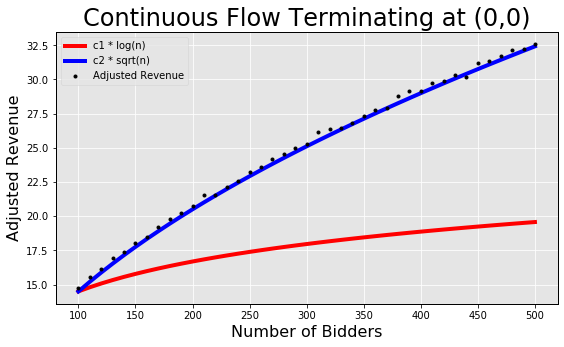

In [18]:
# plot the results
title = 'Continuous Flow Terminating at (0,0)'
log_bench = [3.15*np.log(n) for n in num_bidders]
sqrt_bench = [1.45*np.sqrt(n) for n in num_bidders]

plt1 = plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_vv2s,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c1 * log(n)', 'c2 * sqrt(n)', 'Adjusted Revenue'])
plt.title(title, fontsize = 24)
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')

In [19]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_vv2s, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_vv2s, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 11.404024815723893 
b = -39.15893241863045 
error = 12.950779857102976

sqrt fit: 
a = 1.4455902320718472 
b = 0.33854336284292835 
error = 0.9931792072783143
